In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style()

## Get an overview of the data

In [2]:
data = pd.read_csv("./train.csv")
print(data.describe())
print(data.head())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
   PassengerId  Survived  Pclass  \
0            1         0       3   
1        

## See the Sex proportions
We can see that 74.2% of women survived. Our model should be better than that.

In [3]:
women_survived = data[data["Sex"] == "female"][data["Survived"] == 1].shape[0] / data[data["Sex"] == "female"].shape[0] * 100
men_survived = data[data["Sex"] == "male"][data["Survived"] == 1].shape[0] / data[data["Sex"] == "male"].shape[0] * 100
men_onboard = data[data["Sex"] == "male"].shape[0] / data.shape[0] * 100
print("{:.2f}% of women survived.".format(women_survived))
print("{:.2f}% of men survived.".format(men_survived))
print("{:.2f}% of men were aboard".format(men_onboard))

74.20% of women survived.
18.89% of men survived.
64.76% of men were aboard


<ipython-input-3-df2065df0d82>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_survived = data[data["Sex"] == "female"][data["Survived"] == 1].shape[0] / data[data["Sex"] == "female"].shape[0] * 100
<ipython-input-3-df2065df0d82>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  men_survived = data[data["Sex"] == "male"][data["Survived"] == 1].shape[0] / data[data["Sex"] == "male"].shape[0] * 100


## See relation between age and survivance

/usr/local/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


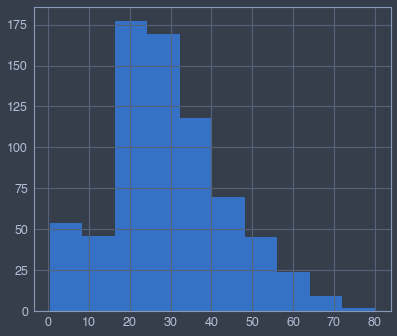

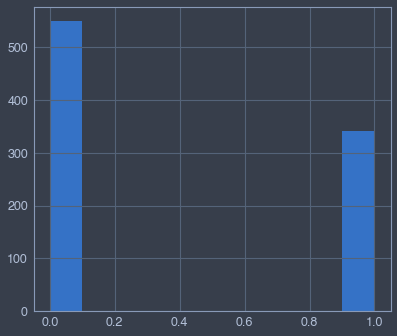

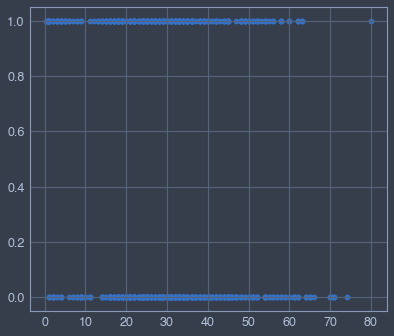

In [4]:
plt.hist(data["Age"])
plt.show()
plt.hist(data["Survived"])
plt.show()
plt.scatter(data["Age"], data["Survived"])
plt.show()

In [5]:
for age in range(0, 80, 10):
    mask = data["Age"].between(age, age + 10)
    survived = data["Survived"] == 1
    women = data["Sex"] == "female"
    percentage = data[mask & survived].shape[0] / data[mask].shape[0] * 100
    number = data[mask].shape[0]
    if (data[mask & women].shape[0] > 0):
        percentage_women = data[mask & women & survived].shape[0] / data[mask & women].shape[0] * 100
    else:
        percentage_women = np.nan
    print("{:.2f}% ({:.2f}% for women) ({} people) of people aged {}-{} survived.".format(percentage, percentage_women, number, age, age + 10))

59.38% (61.29% for women) (64 people) of people aged 0-10 survived.
37.61% (72.34% for women) (117 people) of people aged 10-20 survived.
35.51% (73.49% for women) (245 people) of people aged 20-30 survived.
43.89% (83.33% for women) (180 people) of people aged 30-40 survived.
39.39% (70.27% for women) (99 people) of people aged 40-50 survived.
42.31% (89.47% for women) (52 people) of people aged 50-60 survived.
28.57% (100.00% for women) (21 people) of people aged 60-70 survived.
14.29% (nan% for women) (7 people) of people aged 70-80 survived.


Age and sex are both decisive factors. We can see that 100% of women aged 60-70 survived, 89.47% for 50-60, and 83.3% for 30-40.
In general, people aged 20-30 were more likely to die.

## The impact of social class

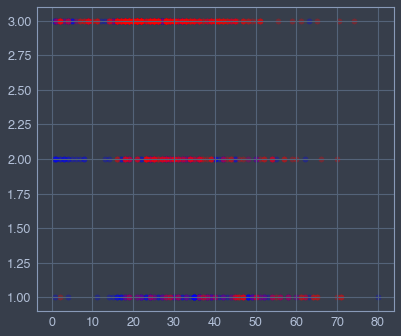

In [6]:
survived = data["Survived"] == 1
plt.scatter(data[survived]["Age"], data[survived]["Pclass"], color="blue", alpha=0.3)
plt.scatter(data[~survived]["Age"], data[~survived]["Pclass"], color="red", alpha=0.3)
plt.show()

In [7]:
c1 = data["Pclass"] == 1
c2 = data["Pclass"] == 2
c3 = data["Pclass"] == 3
survived = data["Survived"] == 1

c1_survived = data[c1 & survived].shape[0] / data[c1].shape[0] * 100
c2_survived = data[c2 & survived].shape[0] / data[c2].shape[0] * 100
c3_survived = data[c3 & survived].shape[0] / data[c3].shape[0] * 100

print("{:.2f}% of passengers in classe 1 survived.".format(c1_survived))
print("{:.2f}% of passengers in classe 2 survived.".format(c2_survived))
print("{:.2f}% of passengers in classe 3 survived.".format(c3_survived))

62.96% of passengers in classe 1 survived.
47.28% of passengers in classe 2 survived.
24.24% of passengers in classe 3 survived.


Class is also an important factor.

## Importance of the number of siblings and parchs

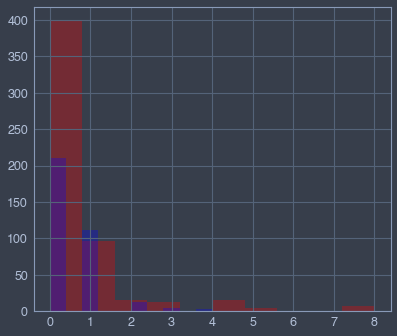

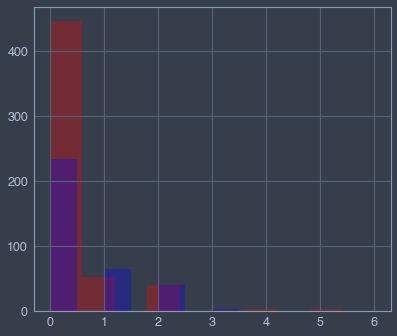

In [8]:
plt.hist(data[~survived]["SibSp"], color="red", alpha=0.3)
plt.hist(data[survived]["SibSp"], color="blue", alpha=0.3)
plt.show()
plt.hist(data[~survived]["Parch"], color="red", alpha=0.3)
plt.hist(data[survived]["Parch"], color="blue", alpha=0.3)
plt.show()

We can try creating a cleaner feature that contains both information, such as "has the passenger any family on board ?"

In [9]:
has_sib = data["SibSp"] > 0
has_parch = data["Parch"] > 0
has_family = has_sib | has_parch

has_family_percentage = data[has_family].shape[0] / data.shape[0] * 100
has_family_survived = data[has_family & survived].shape[0] / data[has_family].shape[0] * 100
hasnt_family_survived = data[~has_family & survived].shape[0] / data[~has_family].shape[0] * 100

print("{:.2f}% of passengers have family onboard.".format(has_family_percentage))
print("{:.2f}% of passengers with family onboard survived.".format(has_family_survived))
print("{:.2f}% of passengers without family onboard survived.".format(hasnt_family_survived))

39.73% of passengers have family onboard.
50.56% of passengers with family onboard survived.
30.35% of passengers without family onboard survived.


Having a family onboard seems to be significant.

## Embarcation

In [20]:
print(data["Embarked"].unique())

percentage_s = data[data["Embarked"] == "S"][survived].shape[0] / data[data["Embarked"] == "S"].shape[0] * 100
percentage_c = data[data["Embarked"] == "C"][survived].shape[0] / data[data["Embarked"] == "C"].shape[0] * 100
percentage_q = data[data["Embarked"] == "Q"][survived].shape[0] / data[data["Embarked"] == "Q"].shape[0] * 100

print("{:.2f}% of passengers from port S survived.".format(percentage_s))
print("{:.2f}% of passengers from port C survived.".format(percentage_c))
print("{:.2f}% of passengers from port Q survived.".format(percentage_q))

['S' 'C' 'Q' nan]
33.70% of passengers from port S survived.
55.36% of passengers from port C survived.
38.96% of passengers from port Q survived.


<ipython-input-20-0a2307fe63ba>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  percentage_s = data[data["Embarked"] == "S"][survived].shape[0] / data[data["Embarked"] == "S"].shape[0] * 100
<ipython-input-20-0a2307fe63ba>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  percentage_c = data[data["Embarked"] == "C"][survived].shape[0] / data[data["Embarked"] == "C"].shape[0] * 100
<ipython-input-20-0a2307fe63ba>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  percentage_q = data[data["Embarked"] == "Q"][survived].shape[0] / data[data["Embarked"] == "Q"].shape[0] * 100


## Name analysis

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Countess.      1
Don.           1
Sir.           1
Jonkheer.      1
Lady.          1
Mme.           1
Ms.            1
Capt.          1
dtype: int64


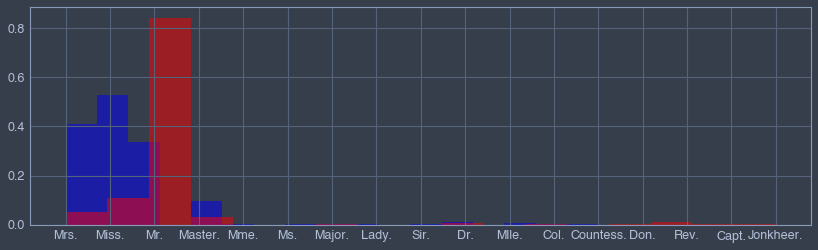

In [43]:
titles = ['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess', 'Jonkheer']
print(data["Name"].str.extract(r'([A-Za-z]*[.])').value_counts())
data["Title"] = data["Name"].str.extract(r'([A-Za-z]*[.])')
plt.figure(figsize=(14, 4))
plt.hist(data["Title"][data["Survived"] == 1], bins=len(titles), density=True, stacked=True, alpha=0.5, color="blue")
plt.hist(data["Title"][data["Survived"] == 0], bins=len(titles), density=True, stacked=True, alpha=0.5, color="red")
plt.show()

## Is fare linked to family size?

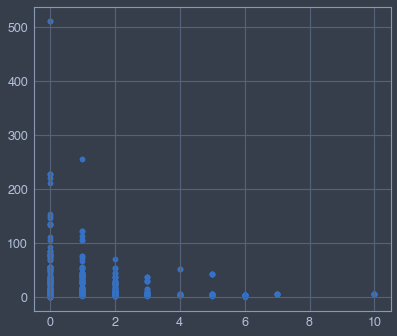

In [50]:
data["Family"] = data["Parch"] + data["SibSp"]
data["FareAjusted"] = data["Fare"] / (data["Family"] + 1)
plt.scatter(data["Family"], data["FareAjusted"])
plt.show()

## Cabin

In [63]:
data["CabinAfter"] = data["Cabin"].str.extract(r'([A-Za-z])')
data["CabinAfter"] = data["CabinAfter"].fillna("U")
print(data["CabinAfter"].value_counts())
for ticket in ["C", "B", "D", "E", "A", "F", "G", "T"]:
    t = data["CabinAfter"] == ticket
    s = data["Survived"] == 1
    prop = data[t & s].shape[0] / data[t].shape[0] * 100
    print("{:.2f}% of passengers with ticket {} survived.".format(prop, ticket))

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: CabinAfter, dtype: int64
59.32% of passengers with ticket C survived.
74.47% of passengers with ticket B survived.
75.76% of passengers with ticket D survived.
75.00% of passengers with ticket E survived.
46.67% of passengers with ticket A survived.
61.54% of passengers with ticket F survived.
50.00% of passengers with ticket G survived.
0.00% of passengers with ticket T survived.


## Ticket

In [64]:
print(data["Ticket"].value_counts())

CA. 2343         7
347082           7
1601             7
CA 2144          6
347088           6
                ..
330935           1
SC/PARIS 2167    1
349215           1
349225           1
2689             1
Name: Ticket, Length: 681, dtype: int64


## Pairplot

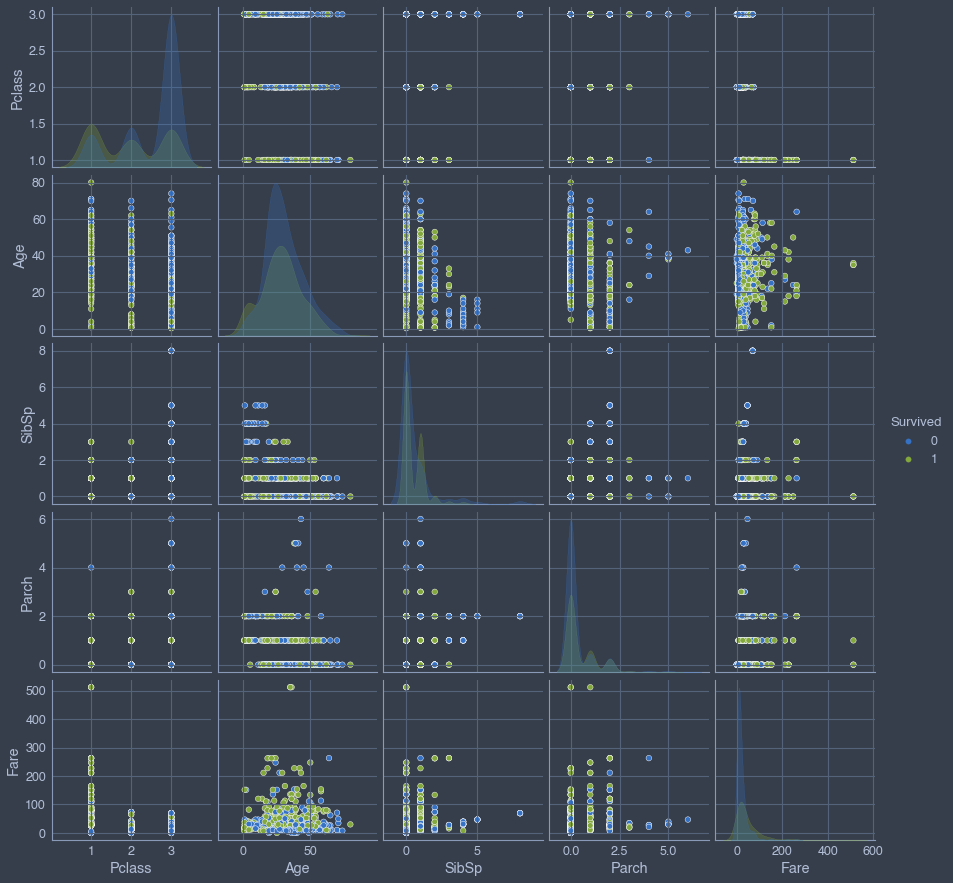

In [10]:
copy = data.drop(columns=['PassengerId'])

sns.pairplot(copy, hue='Survived')
plt.show()

## Correlation matrix

<AxesSubplot:>

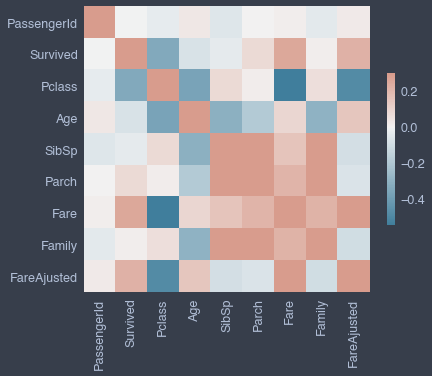

In [51]:
corr = data.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=0, cbar_kws={"shrink": .5})

## Summary
To recap, we have identified these features to be significants:
- **Sex**: female have way higher chances to survive.
- **Age**: age has an impact, children are more likely to survive, elderies are more likely to die. 50-60 yo women have great chances to survive.
- **Class**: first class passengers are 2,5 times more likely to survive than third class passengers.
- **Family**: passengers with family onboard has 20% more likely to survive.